## Importing the libararies

In [127]:

import matplotlib.pyplot as plt 

import numpy as np

import pandas as pd 

from sklearn.preprocessing import StandardScaler



## Importing the datasets


In [128]:

datasets = pd.read_csv('Position_Salaries.csv')

x = datasets.iloc[ : , 1 : -1].values

y = datasets.iloc[ : , -1 ].values

print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [129]:

y = y.reshape(len(y) , 1)

print(y)


[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]



## Feature Scaling


In [130]:

sc_x = StandardScaler()

sc_y = StandardScaler()

x = sc_x.fit_transform(x)

y = sc_y.fit_transform(y)


In [131]:
print(x)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [132]:
print(y)


[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]



## Training the SVR model in the full datasets


In [133]:

# kernel name is gaussian radial basis function

from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')

regressor.fit(x, y)


c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()


## Predicting a new result   ( reversing the feature scaling )


In [134]:

sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))


array([170370.0204065])


## Visualizing the SVR datasets


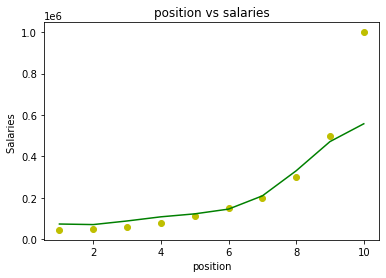

In [135]:

plt.scatter( sc_x.inverse_transform(x) , sc_y.inverse_transform(y) , color = 'y')

plt.plot(sc_x.inverse_transform(x) , sc_y.inverse_transform(regressor.predict(x)) , color = 'g' )

plt.title('position vs salaries')

plt.xlabel('position')

plt.ylabel('Salaries ')

plt.show()


## Visualizing the SVR result (for higher resolution and smoother curve)


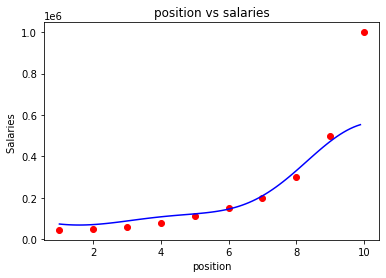

In [140]:

x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)

x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')

plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue')

plt.title('position vs salaries')

plt.xlabel('position')

plt.ylabel('Salaries ')

plt.show()
